In [1]:
from data_loader import *
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
whole_data = []

# loop from 0 to the number of .hdf5 files you want to load
nb_files = 4180

for i in range(0,nb_files):
    # Selects the file
    file_to_load = 'h5/n2data_extended_ballroom_' + str(i) + '.hdf5'
    
    # Gets data
    data = data_loader(file_to_load)
    whole_data.append(data)
    if i%1000 == 0:
            print(f"We've already made {i} importation.")

    
print(len(whole_data))

We've already made 0 importation.
We've already made 1000 importation.
We've already made 2000 importation.
We've already made 3000 importation.
We've already made 4000 importation.
4180


In [3]:
# LIST -> Dictionary(Data) -> Features(numpy.ndarray)
# m -> the m-th example
# feature -> ODF_SET, PeDF_FULL_SET, PeDF_PARTIAL_SET, coeffs
# wavelet_level -> wavelet level
# whole_data[m][feature][wavelet_level]

print(type(whole_data[0]['ODF_SET'][0]))

print(f"O database possui {len(whole_data)} exemplos de treinamento.")
print(f"O nível Wavelet A2 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][0])} amostras.")
print(f"O nível Wavelet D2 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][1])} amostras.")
print(f"O nível Wavelet D1 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][2])} amostras.")

print(whole_data[0]['bpm'])

<class 'numpy.ndarray'>
O database possui 4180 exemplos de treinamento.
O nível Wavelet A2 tem 149 amostras.
O nível Wavelet D2 tem 149 amostras.
O nível Wavelet D1 tem 298 amostras.
87


In [4]:
# CRIANDO VETOR PRÓPRIO Y
y = []
for j in range(0,len(whole_data)): 
    y.append(whole_data[j]['bpm'])
    
print(f"O valor máximo de andamento é {np.max(y)}.")
print(f"O valor mínimo de andamento é {np.min(y)}.")
#print(y)
y = np.array(y).reshape(len(whole_data),1)
print(type(y))
#print(y)
#Começará em 64 e irá de 8 em 8 até 216, (19 "variáveis booleanas") 

O valor máximo de andamento é 216.
O valor mínimo de andamento é 65.
<class 'numpy.ndarray'>


In [5]:
##BLOCO LABEL ENCONDER
Classe = []
for i in range(0,187):
    a = 64+(1*i)
    Classe.append(a)
print(Classe)
# [64 68 72 76 80 84 88 92 96 100 104 108 112 116 120 124 128 132 136 ... 216]
#Classes = np.array(Classe).reshape(19,1)
Classes = np.array(Classe).reshape(187,1)

n_C = Classes.shape[0]

Y = np.zeros(y.shape)
Y = (y>=Classes[0])*1
for i in range(1,n_C):    
    Y += (y>=Classes[i])*1

#print(np.array(Y).tolist())
print(Y)

##BLOCO ONE HOT ENCONDER 
np.array(Y).reshape(len(whole_data),1)
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(Y).toarray()
print(Y[0])


[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250]
[[24]
 [24]
 [24]
 ...
 [57]
 [65]
 [73]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 

1.0
(17, 18, 3)


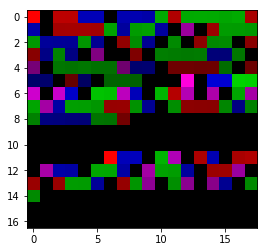

In [6]:
print(whole_data[0]['PeDF_PARTIAL_SET'][2][0])
lista = []

for j in range(0,len(whole_data)):  #varrer m-exemplos

    listaux0 = []    #D1
    listaux1 = []    #D2
    listaux2 = []    #A2
    listaux0.append(1)
    listaux1.append(1)    
    listaux2.append(1)  
    for i in range(1,len(whole_data[0]['PeDF_PARTIAL_SET'][2])):
        if (i<len(whole_data[j]['PeDF_PARTIAL_SET'][2])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][2][i]>whole_data[j]['PeDF_PARTIAL_SET'][2][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][2][i]>whole_data[j]['PeDF_PARTIAL_SET'][2][i+1]):
                listaux0.append(whole_data[j]['PeDF_PARTIAL_SET'][2][i])
            else:
                listaux0.append(0)
        else: 
            listaux0.append(0)

    for i in range(1,len(whole_data[0]['PeDF_PARTIAL_SET'][1])):
        if (i<len(whole_data[0]['PeDF_PARTIAL_SET'][1])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][1][i]>whole_data[j]['PeDF_PARTIAL_SET'][1][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][1][i]>whole_data[j]['PeDF_PARTIAL_SET'][1][i+1]):
                listaux1.append(whole_data[j]['PeDF_PARTIAL_SET'][1][i])
            else:
                listaux1.append(0)
        else: 
            listaux1.append(0)
        if (i<len(whole_data[0]['PeDF_PARTIAL_SET'][0])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][0][i]>whole_data[j]['PeDF_PARTIAL_SET'][0][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][0][i]>whole_data[j]['PeDF_PARTIAL_SET'][0][i+1]):
                listaux2.append(whole_data[j]['PeDF_PARTIAL_SET'][2][i])
            else:
                listaux2.append(0)
        else: 
            listaux2.append(0)
            
#Setar shape 298, 149, 149 17x18 = 306 
    for i in range(0,8):
        listaux0.append(0)
    for i in range(0,8+149):
        listaux1.append(0)
        listaux2.append(0)

#
    lista.append([listaux0, listaux1, listaux2]) #len = 3*306*4180 - 3837240 dados
#print(lista[2])
#lista = np.array(lista).reshape(len(whole_data),3,17,18) #(4180,3,17,18)
lista = np.array(lista).reshape(len(whole_data),17,18,3) #(4180,3,17,18)


# exemplos --> nível wavelet --> imagem (17x18)
listaux0 = np.array(listaux0).reshape(17,18)
listaux1 = np.array(listaux1).reshape(17,18)
listaux2 = np.array(listaux2).reshape(17,18)

print(lista[1].shape)
#imagem

imgplot = plt.imshow(lista[2])


Text(0.5,1,'A2')

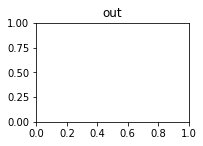

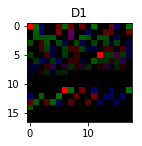

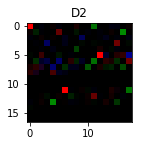

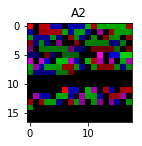

In [7]:
fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
#k = np.concatenate((lista[0][1],lista[0][2],lista[0][0]),axis=1)
#print(k.shape)
#imgplot = plt.imshow(k)
a.set_title('out')
fig = plt.figure()
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(lista[0])
a.set_title('D1')
fig = plt.figure()
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(lista[1])
a.set_title('D2')
fig = plt.figure()
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(lista[2])
a.set_title('A2')


In [8]:
#from sklearn.cross_validation import train_test_split
#X_train, X_val, Y_train, Y_val = train_test_split(lista,Y,test_size=0.08,random_state=0)
#print('Lista Size',lista.shape)
#print('Y Size', Y.shape)
#print('X_train Size',X_train.shape)
#print('X_val Size',X_val.shape)
#print('Y_train Size',Y_train.shape)
#print('Y_val Size',Y_val.shape)

np.random.seed(0)
np.random.shuffle(lista)
np.random.seed(0)
np.random.shuffle(Y)

total_size = lista.shape[0]
test_size = 100
train_size = int((total_size - test_size)*0.92)
val_size = (train_size)

X_test = lista[0:test_size,:,:,:]
Y_test = Y[0:test_size,:]

X_train = lista[test_size:train_size,:,:,:]
Y_train = Y[test_size:train_size,:]
X_val = lista[val_size:total_size,:,:,:]
Y_val = Y[val_size:total_size,:]

print('Lista Size',lista.shape)
print('Y Size', Y.shape)
print('X_train Size',X_train.shape)
print('Y_train Size',Y_train.shape)
print('X_val Size',X_val.shape)
print('Y_val Size',Y_val.shape)
print('X_test Size',X_test.shape)
print('Y_test Size',Y_test.shape)

Lista Size (4180, 17, 18, 3)
Y Size (4180, 85)
X_train Size (3653, 17, 18, 3)
Y_train Size (3653, 85)
X_val Size (427, 17, 18, 3)
Y_val Size (427, 85)
X_test Size (100, 17, 18, 3)
Y_test Size (100, 85)


In [9]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, AvgPool2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [10]:
model = Sequential()
model.add(Conv2D(input_shape=(17,18,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=85, activation="softmax"))

In [11]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
#model.compile(optimizer='Adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['categorical_accuracy','accuracy'])


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 17, 18, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 9, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 9, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [13]:
epochs= 10
batch_size=32
H = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, Y_val))
#H = model.fit(X_train, Y_train, batch_size=32, epochs=epochs)

Train on 3653 samples, validate on 427 samples
Epoch 1/10
3653/3653 [==============================] - 19s 5ms/step - loss: 2.9857 - accuracy: 0.1894 - val_loss: 2.4284 - val_accuracy: 0.2881
Epoch 2/10
3653/3653 [==============================] - 18s 5ms/step - loss: 2.0276 - accuracy: 0.4541 - val_loss: 1.6538 - val_accuracy: 0.5808
Epoch 3/10
3653/3653 [==============================] - 17s 5ms/step - loss: 1.4671 - accuracy: 0.6389 - val_loss: 1.3722 - val_accuracy: 0.6581
Epoch 4/10
3653/3653 [==============================] - 19s 5ms/step - loss: 1.1767 - accuracy: 0.6981 - val_loss: 1.1866 - val_accuracy: 0.7049
Epoch 5/10
3653/3653 [==============================] - 18s 5ms/step - loss: 1.0114 - accuracy: 0.7320 - val_loss: 1.2625 - val_accuracy: 0.7260
Epoch 6/10
3653/3653 [==============================] - 18s 5ms/step - loss: 0.9236 - accuracy: 0.7536 - val_loss: 1.1552 - val_accuracy: 0.7237
Epoch 7/10
3653/3653 [==============================] - 18s 5ms/step - loss: 0.8005

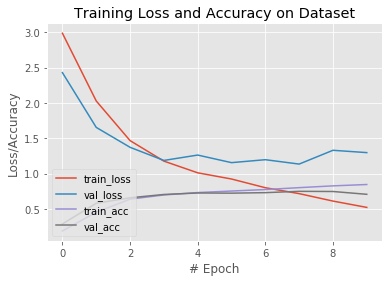

In [14]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

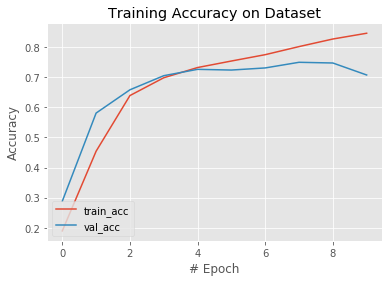

In [15]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

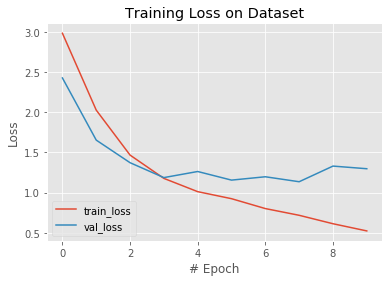

In [16]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


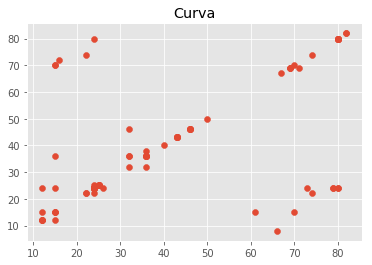

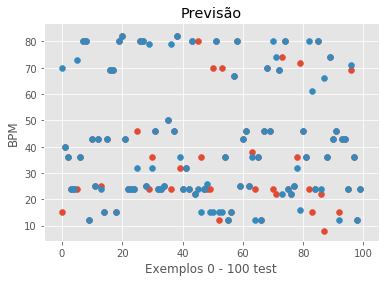

In [17]:
Auxtest = [list(range(0,len(Y_test)))]
Auxtest = np.array(Auxtest).reshape(len(Y_test))
y_predtestlist = []
y_testlist = []
y_predtest = model.predict(X_test)
for i in range (0,len(y_predtest)):
    y_predtest[i] = (y_predtest[i] == np.max(y_predtest[i]))
    aux = 0 
    for j in range(0,85):
        aux = aux + 1
        if (y_predtest[i][j]==1):
            y_predtestlist.append(aux)
        if (Y_test[i][j]==1):
            y_testlist.append(aux)
#y_predtest = (y_predtest > 0.5)
print(y_predtest[1])
print(Y_test[1])
plt.scatter(y_testlist,y_predtestlist)
plt.title('Curva')
plt.show()
plt.scatter(Auxtest,y_predtestlist)
plt.scatter(Auxtest,y_testlist)
plt.xlabel('Exemplos 0 - 100 test')
plt.ylabel('BPM')
plt.title('Previsão')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


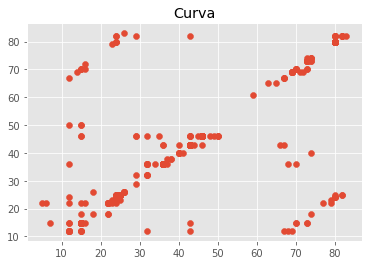

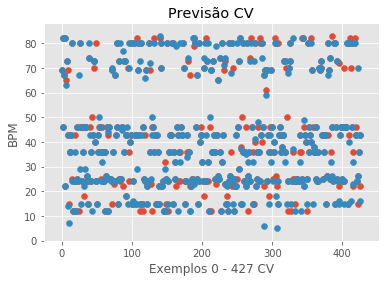

In [18]:
Auxval = [list(range(0,len(Y_val)))]
Auxval = np.array(Auxval).reshape(len(Y_val))
y_predvallist = []
y_vallist = []
y_predval = model.predict(X_val)
for i in range (0,len(y_predval)):
    y_predval[i] = (y_predval[i] == np.max(y_predval[i]))
    aux = 0
    for j in range(0,85):
        aux = aux + 1
        if (y_predval[i][j]==1):
            y_predvallist.append(aux)
        if (Y_val[i][j]==1):
            y_vallist.append(aux)
#y_predval = (y_predval > 0.5)
print(y_predval[1])
print(Y_val[1])
plt.scatter(y_vallist,y_predvallist)
plt.title('Curva')
plt.show()
plt.scatter(Auxval,y_predvallist)
plt.scatter(Auxval,y_vallist)
plt.xlabel('Exemplos 0 - 427 CV')
plt.ylabel('BPM')
plt.title('Previsão CV')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


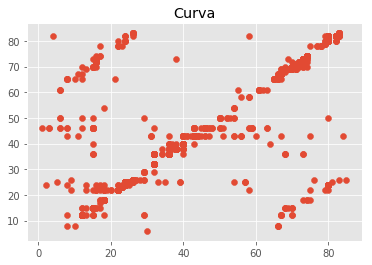

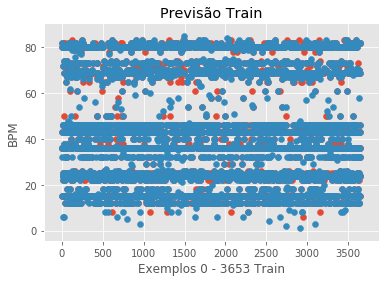

In [19]:
Auxtrain = [list(range(0,len(Y_train)))]
Auxtrain = np.array(Auxtrain).reshape(len(Y_train))
y_predtrainlist = []
y_trainlist = []
y_predtrain = model.predict(X_train)
for i in range (0,len(y_predtrain)):
    y_predtrain[i] = (y_predtrain[i] == np.max(y_predtrain[i]))
    aux = 0 
    for j in range(0,85):
        aux = aux + 1
        if (y_predtrain[i][j]==1):
            y_predtrainlist.append(aux)
        if (Y_train[i][j]==1):
            y_trainlist.append(aux)
#y_predtrain = (y_predtrain > 0.5)
#print(len(y_predtrain))
print(y_predtrain[1])
print(Y_train[1])
plt.scatter(y_trainlist,y_predtrainlist)
plt.title('Curva')
plt.show()
plt.scatter(Auxtrain,y_predtrainlist)
plt.scatter(Auxtrain,y_trainlist)
plt.xlabel('Exemplos 0 - 3653 Train')
plt.ylabel('BPM')
plt.title('Previsão Train')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
cmval = confusion_matrix(Y_val[1], y_predval[1])
print(cmval) 

[[84  0]
 [ 0  1]]


In [21]:
a=0
for i in range(0,len(Y_val)):
    cm = confusion_matrix(Y_val[i], y_predval[i])
    if (cm[0][0]==84):
        a=a+1
b=0
for i in range(0,len(Y_train)):
    cm = confusion_matrix(Y_train[i], y_predtrain[i])
    if (cm[0][0]==84):
        b=b+1
c=0
for i in range(0,len(Y_test)):
    cm = confusion_matrix(Y_test[i], y_predtest[i])
    if (cm[0][0]==84):
        c=c+1

print(f"O conjunto de treinamento acertou {b} músicas das {len(Y_train)} do database")
print(f"O conjunto de validação acertou acertou {a} músicas das {len(Y_val)} do database")
print(f"O conjunto de teste acertou acertou {c} músicas das {len(Y_test)} do database")

O conjunto de treinamento acertou 3168 músicas das 3653 do database
O conjunto de validação acertou acertou 302 músicas das 427 do database
O conjunto de teste acertou acertou 72 músicas das 100 do database


In [22]:
print(f"O conjunto de treinamento tem {b*100/(len(Y_train))}% de acerto.")
print(f"O conjunto de validação tem {a*100/(len(Y_val))}% de acerto.")
print(f"O conjunto de teste tem {c*100/(len(Y_test))}% de acerto.")

O conjunto de treinamento tem 86.72324117163974% de acerto.
O conjunto de validação tem 70.72599531615926% de acerto.
O conjunto de teste tem 72.0% de acerto.
